In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('D:/DS-Intern-Assignment-[Gautam Yakasiri]/data/data.csv',header=0)

In [3]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [5]:
df.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])   ### converting time stamp datatype

In [7]:
df.isnull().sum().sort_values(ascending=False)    ### checking null values

zone9_humidity                  888
zone3_humidity                  878
zone1_temperature               867
zone2_humidity                  867
zone2_temperature               853
zone8_temperature               848
zone6_temperature               848
zone6_humidity                  847
equipment_energy_consumption    844
atmospheric_pressure            842
zone5_temperature               838
wind_speed                      828
random_variable1                826
dew_point                       826
random_variable2                824
zone4_temperature               816
visibility_index                815
lighting_energy                 809
outdoor_temperature             806
zone7_humidity                  805
zone3_temperature               802
zone5_humidity                  801
zone1_humidity                  801
outdoor_humidity                799
zone7_temperature               794
zone4_humidity                  781
zone8_humidity                  777
zone9_temperature           

In [8]:
df.duplicated().sum()   ### checking duplicates and dropping them

68

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()   ### checking datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 16789 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16789 non-null  datetime64[ns]
 1   equipment_energy_consumption  15948 non-null  object        
 2   lighting_energy               15983 non-null  object        
 3   zone1_temperature             15927 non-null  object        
 4   zone1_humidity                15990 non-null  object        
 5   zone2_temperature             15941 non-null  object        
 6   zone2_humidity                15926 non-null  float64       
 7   zone3_temperature             15991 non-null  float64       
 8   zone3_humidity                15912 non-null  float64       
 9   zone4_temperature             15978 non-null  float64       
 10  zone4_humidity                16014 non-null  float64       
 11  zone5_temperature             159

In [11]:
cols_to_convert = [
    'equipment_energy_consumption', 'lighting_energy',
    'zone1_temperature', 'zone1_humidity',
    'zone2_temperature'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
####  converting incorrect object datatypes to float

In [12]:
df.info()   ### recheck

<class 'pandas.core.frame.DataFrame'>
Index: 16789 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16789 non-null  datetime64[ns]
 1   equipment_energy_consumption  15880 non-null  float64       
 2   lighting_energy               15928 non-null  float64       
 3   zone1_temperature             15845 non-null  float64       
 4   zone1_humidity                15903 non-null  float64       
 5   zone2_temperature             15871 non-null  float64       
 6   zone2_humidity                15926 non-null  float64       
 7   zone3_temperature             15991 non-null  float64       
 8   zone3_humidity                15912 non-null  float64       
 9   zone4_temperature             15978 non-null  float64       
 10  zone4_humidity                16014 non-null  float64       
 11  zone5_temperature             159

In [13]:
df.fillna(df.mean(), inplace=True)   ### imputing missing values with mean , since number of null values are not negligible to drop

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16789 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16789 non-null  datetime64[ns]
 1   equipment_energy_consumption  16789 non-null  float64       
 2   lighting_energy               16789 non-null  float64       
 3   zone1_temperature             16789 non-null  float64       
 4   zone1_humidity                16789 non-null  float64       
 5   zone2_temperature             16789 non-null  float64       
 6   zone2_humidity                16789 non-null  float64       
 7   zone3_temperature             16789 non-null  float64       
 8   zone3_humidity                16789 non-null  float64       
 9   zone4_temperature             16789 non-null  float64       
 10  zone4_humidity                16789 non-null  float64       
 11  zone5_temperature             167

In [15]:
df.drop('timestamp', axis=1, inplace=True)  ### dropping timestamp, because we don't need it anymore for ml model

In [16]:
df.describe()   ### checking for outliers

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,16789.000000,16789.000000,16789.000000,16789.000000,16789.000000,16789.000000,16789.000000,16789.000000,16789.000000,16789.000000,...,16789.000000,16789.000000,16789.000000,16789.000000,16789.000000,16789.000000,16789.000000,16789.000000,16789.000000,16789.000000
mean,95.787256,3.935337,21.248633,39.046351,19.792984,39.488571,21.666530,38.197731,20.240384,37.942745,...,18.850306,40.315025,6.219168,755.760290,78.959506,4.196572,38.445121,2.780896,24.884603,25.114924
std,177.515187,14.219728,2.102057,9.700600,2.854291,9.879258,2.532843,9.888447,2.710726,10.536360,...,2.473474,10.890072,7.380296,13.317607,27.902227,4.306071,20.740726,5.933581,25.526647,24.874151
min,-1139.985693,-86.002966,8.726818,-46.660000,2.988199,-77.265503,6.543921,-71.406273,4.613485,-81.446225,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,50.000000,0.000000,20.600000,37.126667,18.666667,37.933333,20.600000,36.750000,19.290000,35.276000,...,17.890000,38.363333,3.183333,751.100000,72.000000,2.000000,29.000000,0.588889,12.814858,12.814678
50%,60.000000,0.000000,21.290000,39.046351,19.700000,40.060000,21.666667,38.200000,20.240384,37.942745,...,18.850306,40.315025,6.219168,755.816667,83.000000,4.000000,40.000000,2.780896,24.884603,25.114924
75%,95.787256,3.935337,22.100000,42.326667,20.700000,42.790000,22.700000,41.000000,21.290000,41.245000,...,20.100000,43.500000,9.066667,761.741667,91.500000,5.666667,40.000000,5.150000,37.247027,37.284909
max,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,81.446225,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [17]:
print(df.describe())

       equipment_energy_consumption  lighting_energy  zone1_temperature  \
count                  16789.000000     16789.000000       16789.000000   
mean                      95.787256         3.935337          21.248633   
std                      177.515187        14.219728           2.102057   
min                    -1139.985693       -86.002966           8.726818   
25%                       50.000000         0.000000          20.600000   
50%                       60.000000         0.000000          21.290000   
75%                       95.787256         3.935337          22.100000   
max                     1139.985693        86.002966          33.746609   

       zone1_humidity  zone2_temperature  zone2_humidity  zone3_temperature  \
count    16789.000000       16789.000000    16789.000000       16789.000000   
mean        39.046351          19.792984       39.488571          21.666530   
std          9.700600           2.854291        9.879258           2.532843   
min     

In [18]:
print(df.iloc[:, 10:20].describe())

       zone5_temperature  zone5_humidity  zone6_temperature  zone6_humidity  \
count       16789.000000    16789.000000       16789.000000    16789.000000   
mean           19.053064       50.276171           6.473805       59.204505   
std             2.288158       18.272477           8.644296       51.198831   
min             5.921094     -141.640143         -42.987365     -353.393026   
25%            18.100000       45.500000           3.126667       38.893333   
50%            19.053064       49.266667           6.473805       59.942500   
75%            20.066667       53.590000           9.566667       85.666667   
max            32.157594      141.640143          55.932271      353.393026   

       zone7_temperature  zone7_humidity  zone8_temperature  zone8_humidity  \
count       16789.000000    16789.000000       16789.000000    16789.000000   
mean           19.672056       34.036835          21.607292       41.851718   
std             2.814928       11.077395           

### Treating Negative Values

In [19]:
df[df < 0] = np.nan  ### setting negative to null values

In [20]:
# Impute missing values with column-wise mean
df.fillna(df.mean(), inplace=True)

In [21]:
print(df.describe())

       equipment_energy_consumption  lighting_energy  zone1_temperature  \
count                  16789.000000     16789.000000       16789.000000   
mean                     107.842818         4.887489          21.248633   
std                      142.943943        11.311355           2.102057   
min                       10.000000         0.000000           8.726818   
25%                       50.000000         0.000000          20.600000   
50%                       60.000000         0.000000          21.290000   
75%                      100.000000         3.935337          22.100000   
max                     1139.985693        86.002966          33.746609   

       zone1_humidity  zone2_temperature  zone2_humidity  zone3_temperature  \
count    16789.000000       16789.000000    16789.000000       16789.000000   
mean        39.764153          19.792984       40.176966          21.666530   
std          6.125724           2.854291        6.522239           2.532843   
min     

In [22]:
print(df.iloc[:, 10:20].describe())

       zone5_temperature  zone5_humidity  zone6_temperature  zone6_humidity  \
count       16789.000000    16789.000000       16789.000000    16789.000000   
mean           19.053064       52.033832           7.764674       63.114246   
std             2.288158       12.695336           6.422268       40.550563   
min             5.921094       35.363333           0.000000        1.000000   
25%            18.100000       45.760000           4.400000       41.396667   
50%            19.053064       49.700000           7.061875       61.996667   
75%            20.066667       53.590000           9.566667       85.666667   
max            32.157594      141.640143          55.932271      353.393026   

       zone7_temperature  zone7_humidity  zone8_temperature  zone8_humidity  \
count       16789.000000    16789.000000       16789.000000    16789.000000   
mean           19.672056       35.302103          21.607292       43.162495   
std             2.814928        6.695762           

### There are more illogical values of relative humidity, i.e more than 100% for zone5, zone6, outdoor humidity

In [23]:
# set >100% humidity values to NaN
humidity_cols = ['zone5_humidity', 'zone6_humidity', 'outdoor_humidity']

for col in humidity_cols:
    df.loc[df[col] > 100, col] = np.nan
    
df.fillna(df.mean(), inplace=True)

In [24]:
print(df.describe())

       equipment_energy_consumption  lighting_energy  zone1_temperature  \
count                  16789.000000     16789.000000       16789.000000   
mean                     107.842818         4.887489          21.248633   
std                      142.943943        11.311355           2.102057   
min                       10.000000         0.000000           8.726818   
25%                       50.000000         0.000000          20.600000   
50%                       60.000000         0.000000          21.290000   
75%                      100.000000         3.935337          22.100000   
max                     1139.985693        86.002966          33.746609   

       zone1_humidity  zone2_temperature  zone2_humidity  zone3_temperature  \
count    16789.000000       16789.000000    16789.000000       16789.000000   
mean        39.764153          19.792984       40.176966          21.666530   
std          6.125724           2.854291        6.522239           2.532843   
min     

In [25]:
print(df.iloc[:, 10:20].describe())

       zone5_temperature  zone5_humidity  zone6_temperature  zone6_humidity  \
count       16789.000000    16789.000000       16789.000000    16789.000000   
mean           19.053064       51.079081           7.764674       60.180197   
std             2.288158        8.695677           6.422268       28.153243   
min             5.921094       35.363333           0.000000        1.000000   
25%            18.100000       45.760000           4.400000       41.396667   
50%            19.053064       49.700000           7.061875       60.933333   
75%            20.066667       53.290000           9.566667       84.866667   
max            32.157594       96.321667          55.932271       99.900000   

       zone7_temperature  zone7_humidity  zone8_temperature  zone8_humidity  \
count       16789.000000    16789.000000       16789.000000    16789.000000   
mean           19.672056       35.302103          21.607292       43.162495   
std             2.814928        6.695762           

### High Impact Zone Analysis

In [45]:
# Identify zones from column names
zone_temp_cols = [col for col in df.columns if 'temperature' in col and 'zone' in col]
zone_humidity_cols = [col for col in df.columns if 'humidity' in col and 'zone' in col]

# Combine into one frame for correlation with energy usage
zone_stats = df[zone_temp_cols + zone_humidity_cols + ['equipment_energy_consumption']]
corr_matrix = zone_stats.corr()['equipment_energy_consumption'].sort_values(ascending=False)

print("Zones most correlated with equipment energy usage:\n", corr_matrix.head(10))

Zones most correlated with equipment energy usage:
 equipment_energy_consumption    1.000000
zone2_temperature               0.047441
zone3_temperature               0.039333
zone6_temperature               0.037474
zone1_humidity                  0.036984
zone1_temperature               0.030366
zone4_temperature               0.024428
zone3_humidity                  0.018730
zone8_temperature               0.012551
zone9_temperature               0.010277
Name: equipment_energy_consumption, dtype: float64


In [26]:
df.corr()['equipment_energy_consumption'].sort_values(ascending=False)   ### checking correlation of each of the columns with the target variable,
### i.e, equipment energy consumption

equipment_energy_consumption    1.000000
lighting_energy                 0.090026
zone2_temperature               0.047441
zone3_temperature               0.039333
outdoor_temperature             0.038205
zone6_temperature               0.037474
zone1_humidity                  0.036984
wind_speed                      0.031222
zone1_temperature               0.030366
zone4_temperature               0.024428
zone3_humidity                  0.018730
zone8_temperature               0.012551
zone9_temperature               0.010277
zone7_temperature               0.007514
zone5_temperature               0.006590
visibility_index                0.003936
zone4_humidity                  0.003407
zone5_humidity                  0.002818
dew_point                       0.001416
random_variable1               -0.012584
random_variable2               -0.014965
atmospheric_pressure           -0.015475
zone7_humidity                 -0.017484
zone2_humidity                 -0.020674
zone9_humidity  

#### these correlation values show that no variable has a strong correlation with equipment energy consumption, so, since all are weak, I am not dropping any variables yet. There might be non-linear relationships here, let's check

#### so, let's start modelling. Since, this is a regression model and linear relationships are weak, let's start directly with random forest

In [27]:
import matplotlib.pyplot as plt

In [28]:
# X = all features except target
X = df.drop(columns=['equipment_energy_consumption'])
y = df['equipment_energy_consumption']

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform both train and test sets
X_test_scaled = scaler.transform(X_test)

## Model Training

### Random Forest Regression

In [31]:
# Train Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

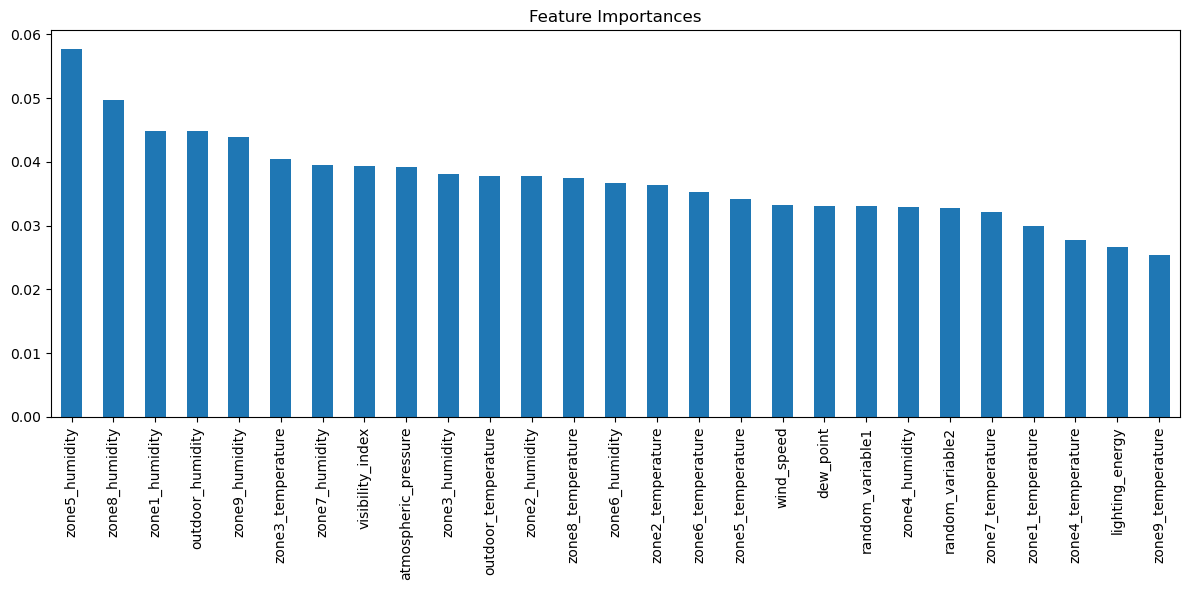

In [32]:
# Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns
pd.Series(importances, index=feature_names).sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title="Feature Importances")
plt.tight_layout()
plt.show()

In [33]:
# Evaluate
y_pred = model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 17341.3774008163


In [34]:
print("R² score:", r2_score(y_test, y_pred))

R² score: 0.13418125239638778


### Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

In [36]:
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R² score:", r2_score(y_test, y_pred_gb))

MSE: 18351.68941141277
R² score: 0.0837384842422072


### XGBoost Regressor

In [37]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R² score:", r2_score(y_test, y_pred_xgb))

MSE: 18698.915853371207
R² score: 0.06640219334889219


### since the best model is still showing r2 score of 0.134, let's try svm with only 5 variables first(because it is a slow model)

### SVM Model

In [38]:
top_5_features = [
    'lighting_energy',
    'zone2_temperature',
    'zone3_temperature',
    'outdoor_temperature',
    'zone6_temperature'
]

In [42]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale features
scaler = StandardScaler()
X_train_scaled_top5 = scaler.fit_transform(X_train[top_5_features])
X_test_scaled_top5 = scaler.transform(X_test[top_5_features])

In [44]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled_top5, y_train)
y_pred = svr_model.predict(X_test_scaled_top5)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R² score: {r2}")

MSE: 20991.614043867085
R² score: -0.04806743787168033


#### Since top 5 features are only showing very less R2 score, we can conclude that svm is not going to work out

### Conclusion
#### Random Forest Regressor is the best model(based on R2 score) for this dataset as it tries to explain the complex relations between the variables